## 1. Installing and Importing Dependencies

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

C:\Users\shrut\miniconda3\envs\works\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Loading the Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

## 3. Making Detections for Testing

In [ ]:
img = 'nothuman.jpg'

In [ ]:
results = model(img)
results.print()

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()));

In [ ]:
img2 = 'person.jpg'
result = model(img2)
result.print()

In [ ]:
plt.imshow(np.squeeze(result.render()));

In [ ]:
img3 = 'people1.jpg'
result1 = model(img3)
result1.print()

In [ ]:
plt.imshow(np.squeeze(result1.render()));

## 4. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
#     results = model(frame)
    
    cv2.imshow("Drowsiness Detection", frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

## 5. Collecting the Dataset for Training the Model on Custom Dataset

In [2]:
import uuid   # Unique identifier
import os
import time

In [ ]:
# creating data directory
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

awake_videos_path = os.path.join('data', 'awake')
sleepy_videos_path = os.path.join('data', 'sleepy')

# make directory if it doesn't exist
if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

In [ ]:
# collecting data from lists
awake_videos = [os.path.join(awake_videos_path, f) for f in os.listdir(awake_videos_path) if f.endswith('.gif')]
drowsy_videos = [os.path.join(sleepy_videos_path, f) for f in os.listdir(sleepy_videos_path) if f.endswith('.gif')]

video_files = {'awake': awake_videos, 'drowsy': drowsy_videos}

In [ ]:
for label, files in video_files.items():
    for video_file in files:
        cap = cv2.VideoCapture(video_file)

        if cap is None or not cap.isOpened():
            print(f"Error opening video file {video_file}")
            continue

        # Get the frame rate of the video file
        fps = cap.get(cv2.CAP_PROP_FPS)
        delay = 1 / fps if fps > 0 else 0

        num_images_collected = 0
        while num_images_collected < number_imgs:
            print(f'Collecting images for {label}, {num_images_collected+1}/{number_imgs}')

            # Loop through the video
            while True:
                # Read the next frame from the video file
                ret, frame = cap.read()

                if not ret:
                    # End of file reached, start from beginning
                    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
                    continue

                if frame.shape[0] == 0 or frame.shape[1] == 0:
                    print(f"Error: frame has invalid size ({frame.shape[0]}x{frame.shape[1]})")

                # Naming out image path
                imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

                # Writes out image to file 
                cv2.imwrite(imgname, frame)

                if frame is not None and frame.shape[0] > 0 and frame.shape[1] > 0:
                    # Render to the screen
                    cv2.imshow('Image Collection', frame)

                # Delay between captures
                time.sleep(delay)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

                num_images_collected += 1
                if num_images_collected >= number_imgs:
                    break

        cap.release()
        cv2.destroyAllWindows()

In [ ]:
!git clone https://github.com/heartexlabs/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

## 6. Load Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\shrut/.cache\torch\hub\master.zip
YOLOv5  2023-2-22 Python-3.7.12 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [4]:
img = os.path.join('data', 'images', 'awake.54b2d086-b27d-11ed-ae24-70cd0df93246.jpg')
img

'data\\images\\awake.54b2d086-b27d-11ed-ae24-70cd0df93246.jpg'

In [5]:
results = model(img)

In [6]:
results.print()

image 1/1: 500x500 1 awake
Speed: 32.8ms pre-process, 667.6ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


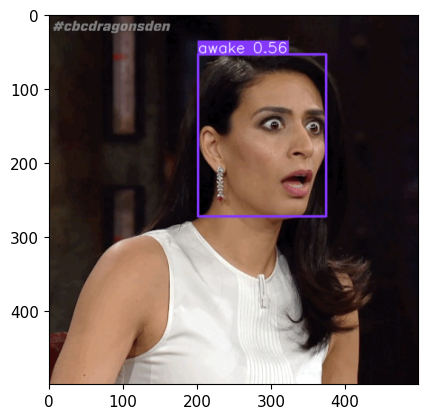

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))

In [8]:
img1 = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJ_i9MOs1wNPkcPcNW21pqv2t5G2XNOHNTFg&usqp=CAU'
result1 = model(img1)

In [9]:
print(result1)

image 1/1: 183x275 1 awake
Speed: 178.2ms pre-process, 471.8ms inference, 11.0ms NMS per image at shape (1, 3, 448, 640)


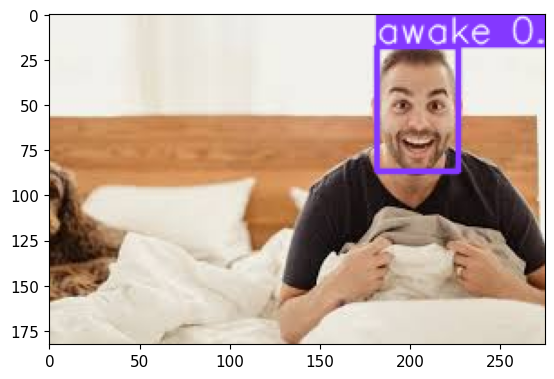

In [10]:
plt.imshow(np.squeeze(result1.render()));

In [11]:
img2 = 'https://pyxis.nymag.com/v1/imgs/63e/8d4/01d3b9fe32e74abf04ae801324b48bc42a-22-try-to-stay-awake.rsquare.w700.jpg'
result2 = model(img2)

In [12]:
print(result2)

image 1/1: 700x700 1 sleepy
Speed: 193.3ms pre-process, 711.0ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


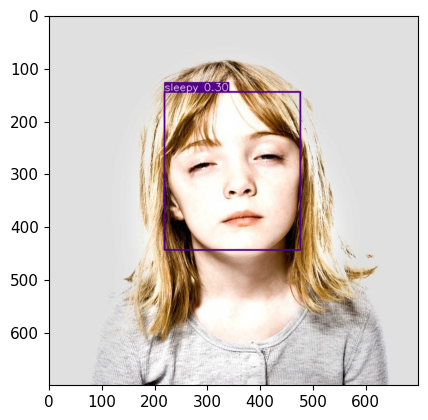

In [13]:
plt.imshow(np.squeeze(result2.render()));